In [1]:
import os
import matplotlib.pyplot as plt

# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labelsize'] = 14
import pandas as pd
import numpy as np


In [2]:
# dir to file to plot
dataDir = os.path.join('data', '4214933506 Geraint 1H Combined Logs.csv')

In [3]:
logs_df = pd.read_csv(dataDir)
logs_df.head()

,Hole Depth (ft),True Vertical Depth (ft),Hydrostatic Pressure (psi),Confined Pressure (psi),Mechanical Specific Energy (psi),Unconfined Compressive Strength (psi),Confined Compressive Strength (psi),Young modulus (GPa),Bulk Density (g/cc),Porosity (fraction),Permeability (nD),Compressional wave (microsec/ft),Shear wave (microsec/ft),NPHI,Gamma
0,541,541.48,39.204760,90.290770,10635.07137,5849.289254,6602.148171,188.563507,2.512576,0.030400,115.616675,79.802802,143.787643,0.4637,21.8473
1,542,542.42,39.272819,127.778581,19430.27762,10686.652690,12575.359450,384.007494,2.530505,0.018907,34.748800,67.868636,112.948465,0.5228,17.4870
2,543,543.37,39.341602,100.424873,22371.63586,12304.399720,14060.130210,409.882565,2.533606,0.016919,26.231854,65.077322,106.403005,0.6313,21.6647
3,544,544.33,39.411108,156.579021,27164.27306,14940.350180,18044.792900,573.024325,2.537350,0.014519,17.810581,61.233585,97.756696,0.4845,23.6051
4,545,545.39,39.487856,114.387344,22614.72261,12438.097430,14434.501790,431.480195,2.533830,0.016776,25.672430,64.863317,105.910644,0.5763,22.7148


axis name: y
step size: 200
before: start=0.0, end=11000.0.
after: start=0.0, end=11000.0.
axis name: x
step size: 40
before: start=0.0, end=180.0.
after: start=0.0, end=180.0.
axis name: x
step size: 1000
before: start=-200.0, end=2000.0.
after: start=-200.0, end=2000.0.


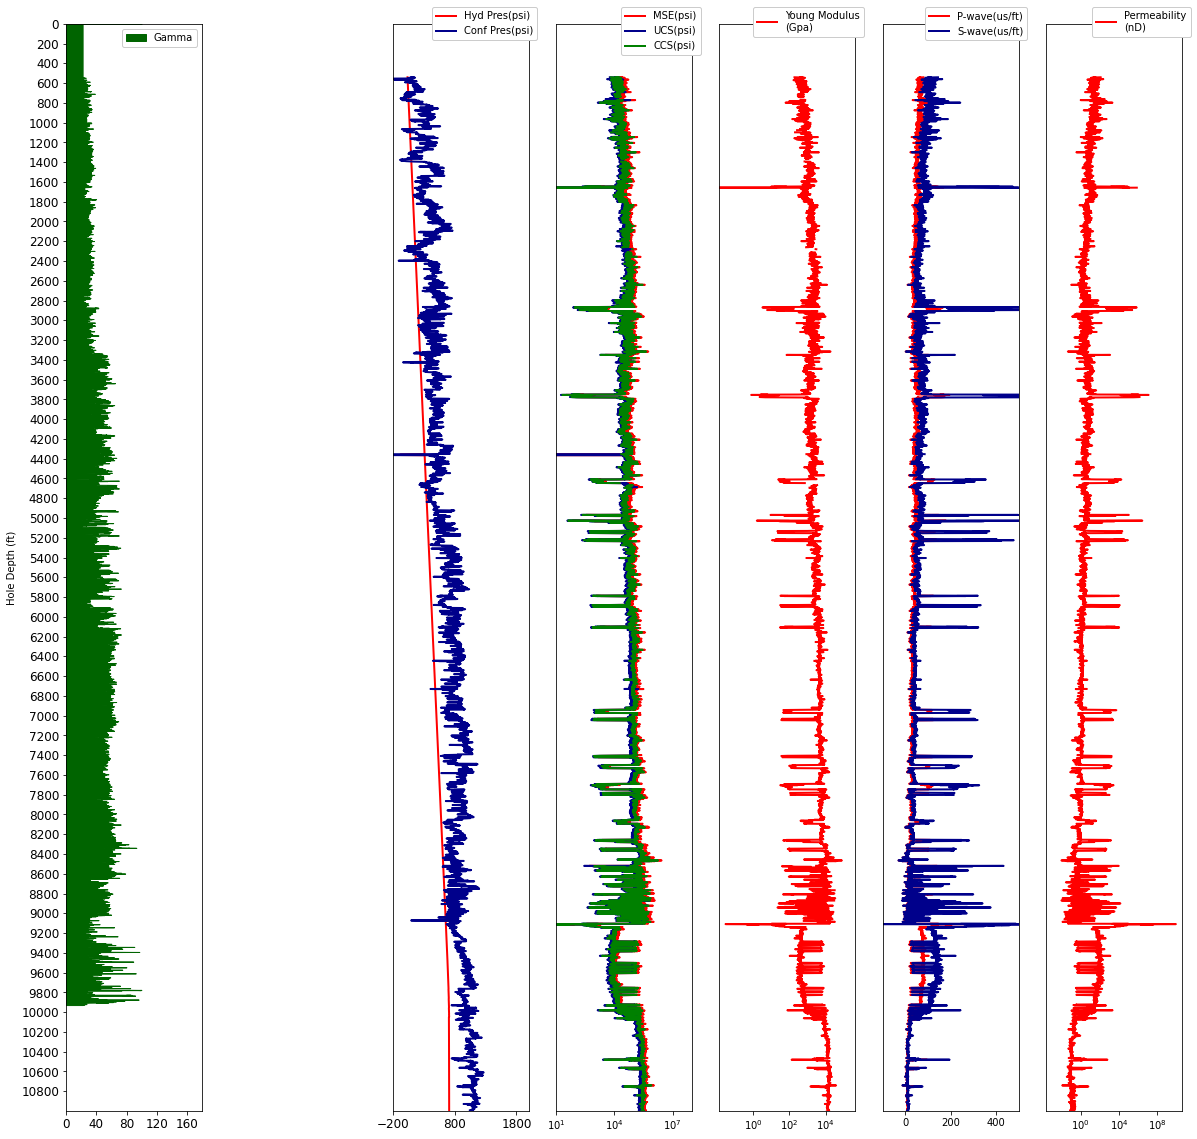

In [56]:
NUM_TRACKS = 7
HOLE_DEPTH_STEP_SIZE = 200
GAMMA_STEP_SIZE = 40
PRESSURE_STEP_SIZE = 1000
X_LABELSIZE = 12
Y_LABELSIZE = 12
HOLE_DEPTH_MINIMUM = 0
HOLE_DEPTH_MAXIMUM_FRACTION = 0.8
Y_LABEL_FONTSIZE = 10
X_LABEL_FONTSIZE = 10
TITLE_FONTSIZE = 14
XTICKS_FONTSIZE = 14
LINEWIDTH = 2
HOLEDEPTH_LIM = (0, 11000)
BBOX_TO_ANCHOR = (0.3, 0.52, 0.8, 0.5)


#COLOR
GAMMA_TRACK_COLOR = 'darkgreen'
HYDROSTATICPRESSURE_TRACK_COLOR = 'red'
CONFINEDPRESSURE_TRACK_COLOR = 'darkblue'
MECHANICAL_SPECIFIC_ENERGY_COLOR = 'red'
UCS_COLOR = 'darkblue'
CCS_COLOR = 'green'
YOUNG_COLOR='red'
COM_WAVE_COLOR = 'red'
SHEAR_WAVE_COLOR = 'darkblue'
PERM_COLOR='red'
def set_ticks_step(axis_instance, axis_name, step_size):
    print(f"axis name: {axis_name}")
    print(f"step size: {step_size}")
    if axis_name == 'y':  
        start, end = axis_instance.get_ylim()
        axis = axis_instance.yaxis
    elif axis_name == 'x':
        start, end = axis_instance.get_xlim()
        axis = axis_instance.xaxis
    else:
        raise ValueError(f'Unknown axis_name of {axis_name}.')
    print(f"before: start={start}, end={end}.")
    start = (start//10)*10
    end = (end//10)*10
    print(f"after: start={start}, end={end}.")
    axis.set_ticks(np.arange(start, end, step_size))
    return axis_instance

    
# general figure object
fig = plt.figure(figsize=(20, 20))

# GAMMA
ax1 = fig.add_subplot(1, NUM_TRACKS, 1)
track_name = 'Gamma'
ax1.fill_between(logs_df['Gamma'], logs_df['Hole Depth (ft)'],
                color=GAMMA_TRACK_COLOR,
                label="Gamma")
ax1.legend(framealpha=1.0)
# limit of x
ax1.set_xlim(0, 180)
#make sure y doesnt show negative
ax1.set_ylim(HOLEDEPTH_LIM)
# set constant step size for y and x
ax1 = set_ticks_step(ax1, 'y', HOLE_DEPTH_STEP_SIZE)
ax1 = set_ticks_step(ax1, 'x', GAMMA_STEP_SIZE)
# make x y label larger
ax1.tick_params(axis='y', labelsize=Y_LABELSIZE)
ax1.tick_params(axis='x', labelsize=X_LABELSIZE)
# depth is inverted
ax1.set_ylim(ax1.get_ylim()[::-1])

# name of y
ax1.set_ylabel('Hole Depth (ft)', fontsize=Y_LABEL_FONTSIZE)


# HYDROSTATIC PRESSURE CONFINED PRESSURE
ax3 = fig.add_subplot(1, NUM_TRACKS, 3)
ax3.plot(logs_df['Hydrostatic Pressure (psi)'], logs_df['Hole Depth (ft)'],
        color=HYDROSTATICPRESSURE_TRACK_COLOR, linewidth=LINEWIDTH,
        label='Hyd Pres(psi)')

ax3.set_xlim(-200, 2000)
# CONFINED PRESSURE
#ax3 = ax2.twinx()
ax3.plot(logs_df['Confined Pressure (psi)'], logs_df['Hole Depth (ft)'],
        color=CONFINEDPRESSURE_TRACK_COLOR, linewidth=LINEWIDTH,
        label='Conf Pres(psi)')
ax3.legend(bbox_to_anchor=BBOX_TO_ANCHOR, framealpha=1.0)
ax3.tick_params(axis='x', labelsize=X_LABELSIZE)
ax3 = set_ticks_step(ax3, 'x', PRESSURE_STEP_SIZE)
ax3.set_ylim(ax1.get_ylim())
ax3.set_yticks([])


# MSE, UCS, CCS
ax4 = fig.add_subplot(1, NUM_TRACKS, 4)
ax4.plot(logs_df['Mechanical Specific Energy (psi)'], logs_df['Hole Depth (ft)'],
        color=MECHANICAL_SPECIFIC_ENERGY_COLOR, linewidth=LINEWIDTH,
        label='MSE(psi)')
ax4.plot(logs_df['Unconfined Compressive Strength (psi)'], logs_df['Hole Depth (ft)'],
        color=UCS_COLOR, linewidth=LINEWIDTH,
        label='UCS(psi)')
ax4.plot(logs_df['Confined Compressive Strength (psi)'], logs_df['Hole Depth (ft)'],
        color=CCS_COLOR, linewidth=LINEWIDTH,
        label='CCS(psi)')
ax4.legend(bbox_to_anchor=BBOX_TO_ANCHOR, framealpha=1.0)
ax4.tick_params(axis='x', labelsize=X_LABEL_FONTSIZE)
ax4.set_xlim(1e1, 1e8)
ax4.set_xscale('log')
ax4.set_ylim(ax1.get_ylim())
ax4.set_yticks([])

# toung
ax5 = fig.add_subplot(1, NUM_TRACKS, 5)
ax5.plot(logs_df['Young modulus (GPa)'], logs_df['Hole Depth (ft)'],
        color=YOUNG_COLOR, linewidth=LINEWIDTH,
        label='Young Modulus\n(Gpa)')
ax5.legend(bbox_to_anchor=BBOX_TO_ANCHOR, framealpha=1.0)
ax5.tick_params(axis='x', labelsize=X_LABEL_FONTSIZE)
ax5.set_ylim(ax1.get_ylim())
ax5.set_yticks([])
ax5.set_xscale('log')


# velocity
ax6 = fig.add_subplot(1, NUM_TRACKS, 6)
ax6.plot(logs_df['Compressional wave (microsec/ft)'], logs_df['Hole Depth (ft)'],
        color=COM_WAVE_COLOR, linewidth=LINEWIDTH,
        label='P-wave(us/ft)')
ax6.plot(logs_df['Shear wave (microsec/ft)'], logs_df['Hole Depth (ft)'],
        color=SHEAR_WAVE_COLOR, linewidth=LINEWIDTH,
        label='S-wave(us/ft)')
ax6.legend(bbox_to_anchor=BBOX_TO_ANCHOR, framealpha=1.0)
ax6.tick_params(axis='x', labelsize=X_LABEL_FONTSIZE)
ax6.set_ylim(ax1.get_ylim())
ax6.set_yticks([])
ax6.set_xlim((-100, 500))

ax7 = fig.add_subplot(1, NUM_TRACKS, 7)
ax7.plot(logs_df['Permeability (nD)'], logs_df['Hole Depth (ft)'],
        color=PERM_COLOR, linewidth=LINEWIDTH,
        label='Permeability\n(nD)')
ax7.legend(bbox_to_anchor=BBOX_TO_ANCHOR, framealpha=1.0)
ax7.tick_params(axis='x', labelsize=X_LABEL_FONTSIZE)
ax7.set_ylim(ax1.get_ylim())
ax7.set_yticks([])
ax7.set_xscale('log')
plt.show()



